In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import brightway2 as bw
import matplotlib.cm as cm

In [3]:
production = xr.load_dataarray("production.nc")
conversion_xr = xr.load_dataarray("conversion_xr.nc")
converted_production = xr.load_dataarray("converted_production.nc")
impacts = xr.load_dataarray("impacts.nc")
scaled_impacts = xr.load_dataarray("scaled_impacts.nc")
costs = xr.load_dataarray("costs.nc")
MF_xr = xr.load_dataarray("MF_xr.nc")

In [30]:
techs = list(costs.coords["technology"].values)
midpoints = list(costs.coords["midpoint"].values)
years = list(costs.coords["year"].values)
regions = list(costs.coords["region"].values)

In [25]:
global_costs = costs.sel(estimate="central").sum(dim="region")

# Stacked area: by technolgy

In [57]:
cmap = cm.get_cmap("tab20")

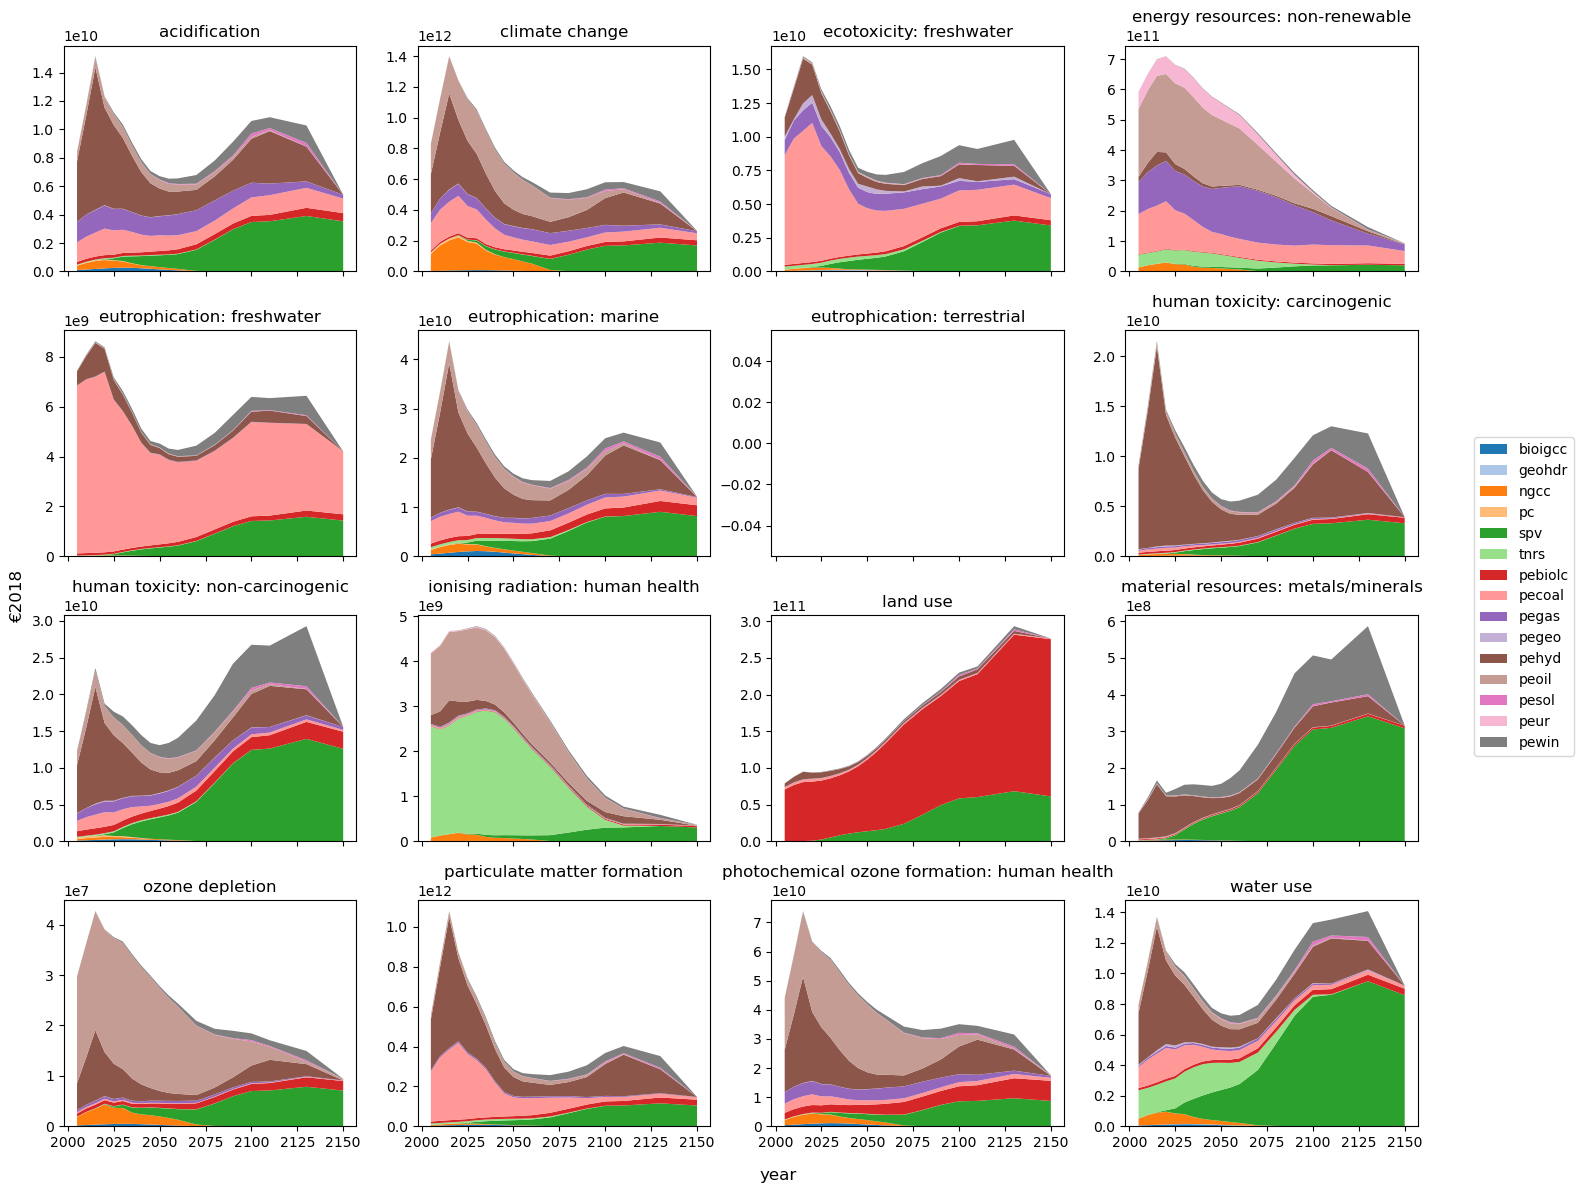

In [62]:
fig, axs = plt.subplots(
    nrows=4, ncols=4, 
    constrained_layout=True, sharex=True, sharey=False,
    figsize=(16, 12)
)

for ax, mp in zip(axs.flat, midpoints):
    y = global_costs.sel(midpoint=mp)
    ax.set_title(mp)
    ax.stackplot(years, y, labels=techs, colors=cmap.colors)

fig.supxlabel("year")
fig.supylabel("€2018")

lines = []
labels = []
  
Line, Label = ax.get_legend_handles_labels()
lines.extend(Line)
labels.extend(Label)

fig.legend(lines, labels, loc=7)
fig.tight_layout()
fig.subplots_adjust(right=0.9)

## Aggregated over impacts

In [66]:
costs_all_impacts = global_costs.sum(dim="midpoint")
costs_all_impacts

<xarray.DataArray (technology: 15, year: 19)>
array([[7.89751055e+09, 1.05264723e+10, 1.39844139e+10, 1.71470534e+10,
        1.94573899e+10, 2.09319401e+10, 2.00574162e+10, 1.77817197e+10,
        1.46599631e+10, 1.14408135e+10, 8.55743840e+09, 5.74169399e+09,
        1.48173992e+09, 2.96601606e+05, 2.92872300e+05, 2.35019747e+05,
        1.20132560e+05, 0.00000000e+00, 0.00000000e+00],
       [8.14046902e+07, 1.20058388e+08, 1.58032695e+08, 2.34599684e+08,
        3.31732911e+08, 4.20826477e+08, 4.53037050e+08, 4.50089941e+08,
        4.51624712e+08, 4.46682309e+08, 4.45249297e+08, 4.39608468e+08,
        3.94015305e+08, 2.91647817e+08, 1.56633783e+08, 1.01510208e+08,
        1.03102704e+08, 9.76218072e+07, 9.23183663e+07],
       [1.30053719e+11, 1.95202007e+11, 2.33698910e+11, 2.57133475e+11,
        2.18293417e+11, 2.04154127e+11, 1.49152724e+11, 1.19226597e+11,
        1.02350509e+11, 8.90431947e+10, 7.35989412e+10, 5.75154308e+10,
        1.05926140e+10, 1.95543494e+09, 1.03211637e+07, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.76611996e+09, 1.07316236e+10, 1.14103724e+10, 1.27593012e+10,
        8.68576926e+09, 7.25326434e+09, 5.51795331e+09, 2.64816358e+09,
        4.40579779e+08, 3.12602321e+06, 1.90221137e+06, 8.42608188e+05,
        3.74430453e+04, 7.96900964e+03, 7.46736473e+03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
       [4.69598463e+11, 5.12492526e+11, 5.48184951e+11, 5.75166849e+11,
        6.02183355e+11, 6.14422238e+11, 6.06207800e+11, 5.83777091e+11,
        5.56245491e+11, 5.18025884e+11, 4.76241487e+11, 4.34882542e+11,
        3.42199358e+11, 2.54901120e+11, 1.81448973e+11, 1.09258903e+11,
        5.52894442e+10, 9.90361870e+09, 6.30878562e+09],
       [0.00000000e+00, 4.55346580e+08, 1.53824817e+08, 4.35484494e+08,
        1.17956012e+09, 1.37189434e+09, 3.63669567e+08, 6.97282383e+08,
        1.78688680e+09, 3.90415446e+09, 4.52669295e+09, 3.12112178e+09,
        4.01505139e+09, 7.32232575e+09, 8.82356482e+09, 2.22977666e+10,
        1.36797150e+10, 2.27401868e+10, 7.06176521e+05],
       [5.69034039e+10, 5.42615506e+10, 5.55083384e+10, 5.82933574e+10,
        6.04145377e+10, 6.22892198e+10, 6.36057908e+10, 6.29033850e+10,
        5.95230494e+10, 5.48077819e+10, 4.94858355e+10, 4.43022852e+10,
        3.50589575e+10, 2.30729918e+10, 1.17968573e+10, 3.97645350e+09,
        9.56488187e+08, 0.00000000e+00, 0.00000000e+00],
       [5.28007255e+08, 3.93756663e+09, 6.81653645e+09, 6.04990590e+09,
        1.52951776e+10, 2.28554915e+10, 2.57272295e+10, 2.72623099e+10,
        2.69302381e+10, 3.11315136e+10, 4.11955711e+10, 5.15871281e+10,
        8.02530344e+10, 9.79132864e+10, 1.26230501e+11, 1.15599922e+11,
        9.88427521e+10, 1.61143517e+11, 2.19913682e+05]])
Coordinates:
  * year        (year) int32 2005 2010 2015 2020 2025 ... 2100 2110 2130 2150
  * technology  (technology) object 'bioigcc' 'geohdr' 'ngcc' ... 'peur' 'pewin'
    estimate    <U7 'central'

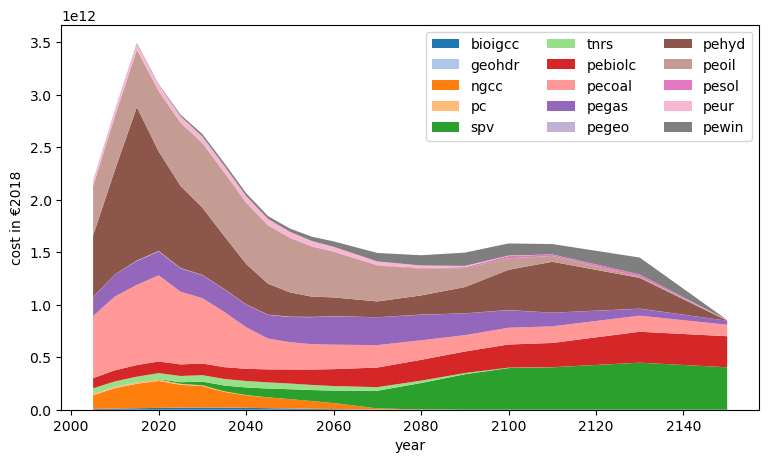

In [75]:
plt.figure(figsize=(9,5))
plt.xlabel("year")
plt.ylabel("cost in €2018")
plt.stackplot(years, costs_all_impacts, labels=techs, colors=cm.get_cmap("tab20").colors)
plt.legend(loc="upper right", ncol=3)
plt.show()

# Stacked areas: by impact category

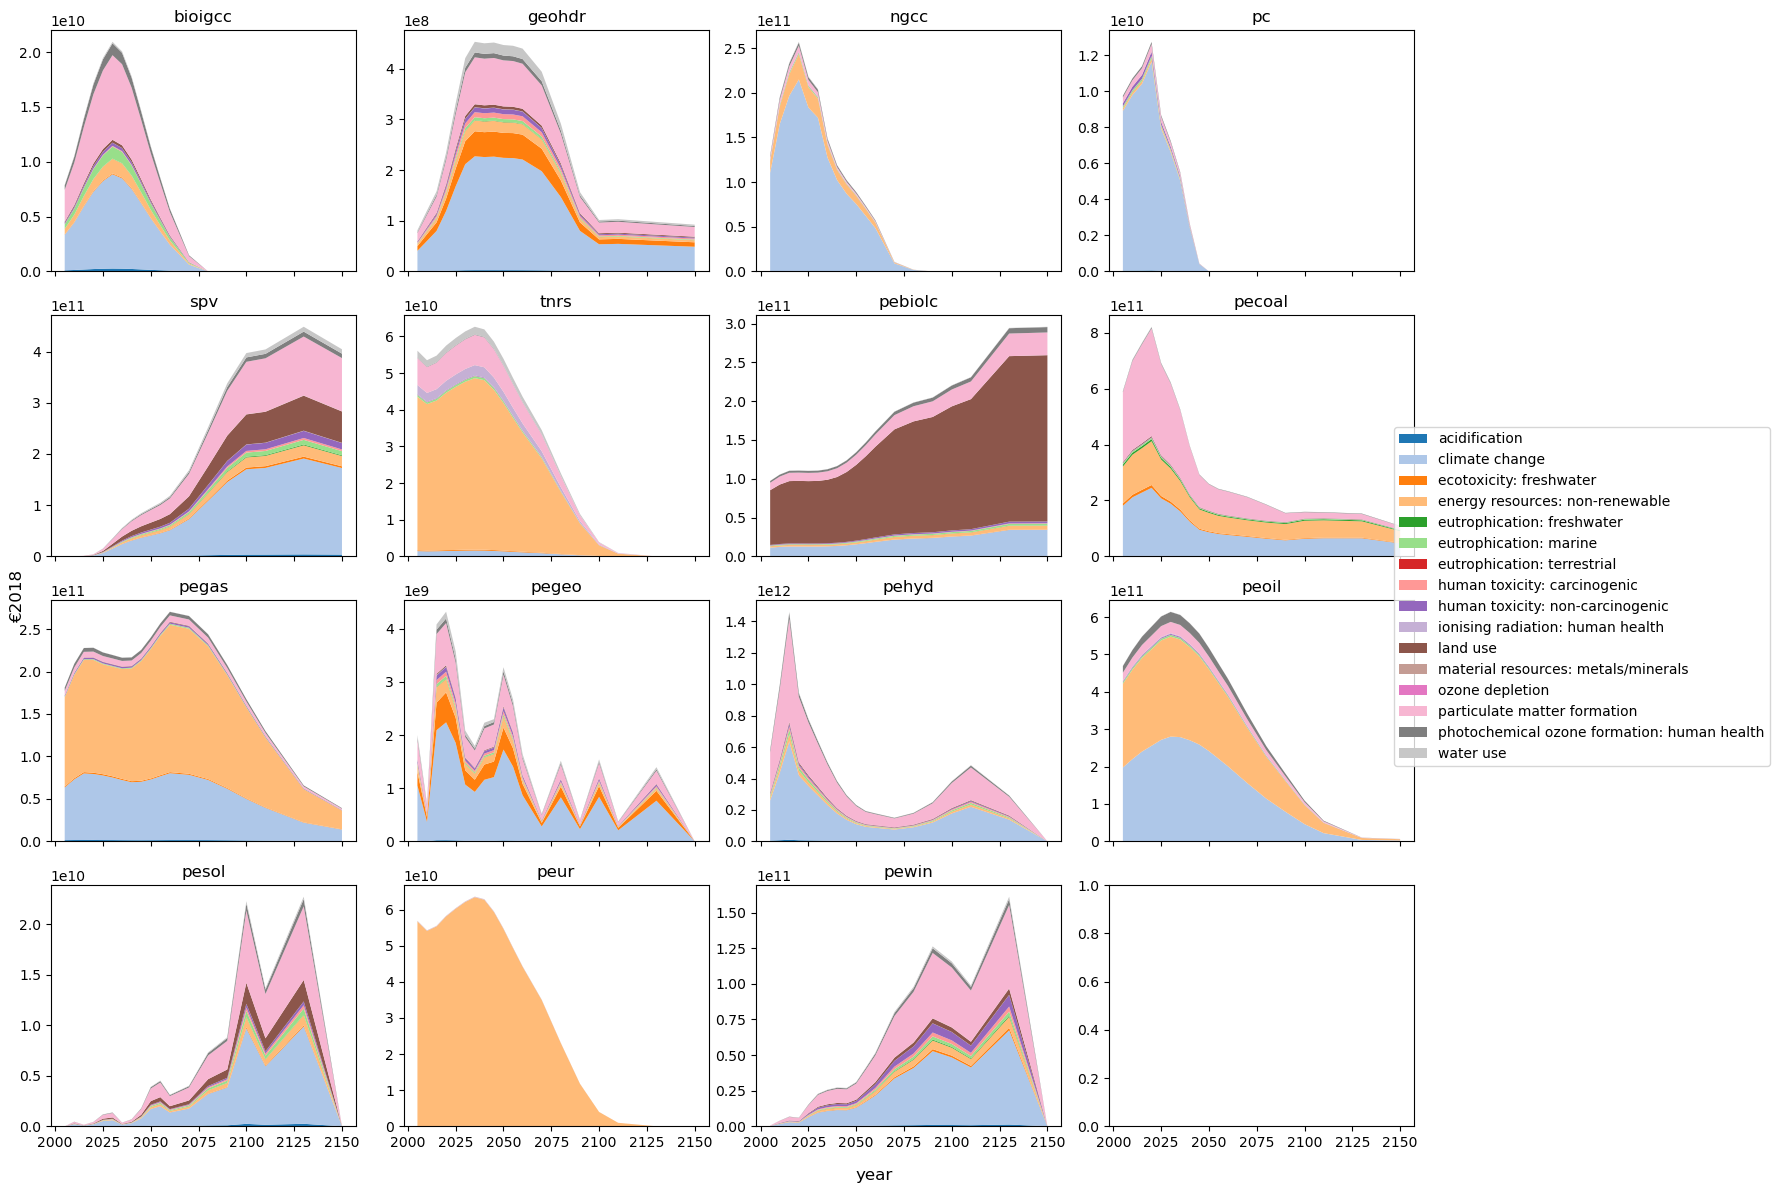

In [76]:
fig, axs = plt.subplots(
    nrows=4, ncols=4, 
    constrained_layout=True, sharex=True, sharey=False,
    figsize=(18, 12)
)

for ax, te in zip(axs.flat[:-1], techs):
    y = global_costs.sel(technology=te)
    ax.set_title(te)
    ax.stackplot(years, y, labels=midpoints, colors=cm.get_cmap("tab20").colors)

fig.supxlabel("year")
fig.supylabel("€2018")

lines = []
labels = []
  
Line, Label = ax.get_legend_handles_labels()
lines.extend(Line)
labels.extend(Label)

fig.legend(lines, labels, loc=7)
fig.tight_layout()
fig.subplots_adjust(right=0.8)

## Aggregate over technologies

In [77]:
costs_all_tech = global_costs.sum(dim="technology")
costs_all_tech

<xarray.DataArray (midpoint: 16, year: 19)>
array([[8.41905493e+09, 1.16995700e+10, 1.51452439e+10, 1.23231202e+10,
        1.11902086e+10, 1.03288904e+10, 9.06281735e+09, 7.89882242e+09,
        7.07015746e+09, 6.70765935e+09, 6.52831588e+09, 6.55061307e+09,
        6.78751736e+09, 7.80607567e+09, 9.13202211e+09, 1.05925005e+10,
        1.08533598e+10, 1.02738848e+10, 5.40292230e+09],
       [8.29699070e+11, 1.12211482e+12, 1.39945385e+12, 1.24247809e+12,
        1.12665815e+12, 1.05360186e+12, 9.24819180e+11, 8.03865545e+11,
        7.12441793e+11, 6.57037415e+11, 6.13268918e+11, 5.82432567e+11,
        5.12854905e+11, 5.09838533e+11, 5.34489568e+11, 5.80076678e+11,
        5.81438921e+11, 5.20904148e+11, 2.64209758e+11],
       [1.15184044e+10, 1.37350520e+10, 1.59713141e+10, 1.55255011e+10,
        1.35050784e+10, 1.22371348e+10, 1.07819004e+10, 9.03600679e+09,
        7.69513471e+09, 7.39314934e+09, 7.20455297e+09, 7.16620273e+09,
        7.38231253e+09, 8.03601859e+09, 8.56504966e+09, 9.37018626e+09,
        9.09084232e+09, 9.76848310e+09, 5.73847267e+09],
       [5.92187855e+11, 6.50874609e+11, 6.99958073e+11, 7.09243675e+11,
        6.80860112e+11, 6.68771730e+11, 6.38612522e+11, 6.03693908e+11,
        5.76359589e+11, 5.57215884e+11, 5.37124605e+11, 5.18032766e+11,
        4.56126355e+11, 3.89641439e+11, 3.24593077e+11, 2.67866186e+11,
        2.16132736e+11, 1.46188724e+11, 9.26245305e+10],
...
       [2.97526741e+07, 3.63035485e+07, 4.27046235e+07, 3.90715360e+07,
        3.75436658e+07, 3.66477914e+07, 3.41723366e+07, 3.18839536e+07,
        2.98947695e+07, 2.77989791e+07, 2.59339173e+07, 2.43542577e+07,
        2.09189091e+07, 1.93448931e+07, 1.89364866e+07, 1.84354630e+07,
        1.70703750e+07, 1.49436572e+07, 9.41249508e+06],
       [5.57363023e+11, 8.22760118e+11, 1.07916407e+12, 8.73248476e+11,
        7.41996985e+11, 6.50438740e+11, 5.45512928e+11, 4.26577214e+11,
        3.32263215e+11, 2.86415041e+11, 2.66605693e+11, 2.61660596e+11,
        2.56590550e+11, 2.73855581e+11, 3.05965551e+11, 3.67781944e+11,
        4.02696231e+11, 3.51938723e+11, 1.47512396e+11],
       [4.41232861e+10, 5.87588544e+10, 7.38813562e+10, 6.34345645e+10,
        6.01820766e+10, 5.77531660e+10, 5.35445889e+10, 4.92255712e+10,
        4.56524283e+10, 4.26709249e+10, 4.01123258e+10, 3.81203569e+10,
        3.42198657e+10, 3.30329796e+10, 3.35161286e+10, 3.50572288e+10,
        3.44855902e+10, 3.15102768e+10, 1.74939191e+10],
       [7.96571144e+09, 1.07674766e+10, 1.36988332e+10, 1.14832326e+10,
        1.06108590e+10, 1.00770124e+10, 9.28475405e+09, 8.46324897e+09,
        7.74675742e+09, 7.38966867e+09, 7.23424406e+09, 7.28273209e+09,
        7.93867282e+09, 9.59729676e+09, 1.15466218e+10, 1.32921754e+10,
        1.35265679e+10, 1.40807457e+10, 9.21302112e+09]])
Coordinates:
  * year      (year) int32 2005 2010 2015 2020 2025 ... 2090 2100 2110 2130 2150
  * midpoint  (midpoint) object 'acidification' 'climate change' ... 'water use'
    estimate  <U7 'central'

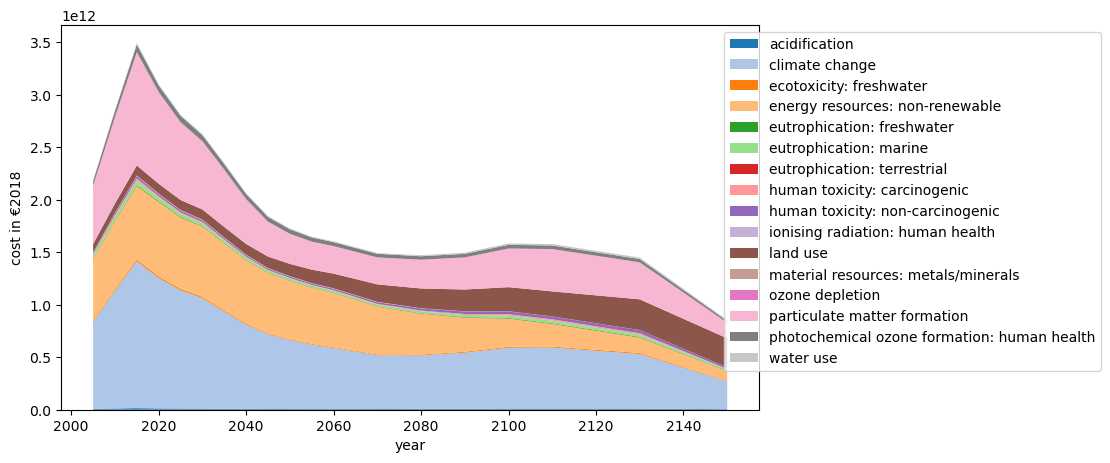

In [81]:
plt.figure(figsize=(9,5))
plt.xlabel("year")
plt.ylabel("cost in €2018")
plt.stackplot(years, costs_all_tech, labels=midpoints, colors=cm.get_cmap("tab20").colors)
plt.legend(loc="upper right", ncol=1, bbox_to_anchor=[1.5, 1])
plt.show()

# Stacked bars: Current impacts per technology per unit

In [23]:
specific_costs = (impacts * MF_xr) * conversion_xr
global_per_unit_costs = specific_costs.sel(estimate="central").sum(dim="region")
df = global_per_unit_costs.to_pandas()
df

midpoint,acidification,climate change,ecotoxicity: freshwater,energy resources: non-renewable,eutrophication: freshwater,eutrophication: marine,eutrophication: terrestrial,human toxicity: carcinogenic,human toxicity: non-carcinogenic,ionising radiation: human health,land use,material resources: metals/minerals,ozone depletion,particulate matter formation,photochemical ozone formation: human health,water use
technology,,,,,,,,,,,,,,,,
bioigcc,5.726968e+10,1.848644e+12,1.648758e+10,2.885932e+11,3.014128e+09,2.356674e+11,0.0,1.437853e+10,6.160901e+10,1.933753e+09,5.528171e+10,7.848124e+08,1.047127e+08,1.659619e+12,2.334538e+11,2.888655e+10
geohdr,5.655187e+08,5.048458e+10,1.059812e+10,4.637355e+09,1.578889e+08,1.287786e+09,0.0,2.239819e+09,2.076142e+09,9.084688e+07,1.427013e+09,1.150607e+07,8.100328e+05,2.072041e+10,2.137784e+09,4.236706e+09
ngcc,1.135308e+10,4.641467e+12,2.590700e+09,4.285580e+11,3.194314e+08,3.501249e+10,0.0,3.256574e+09,7.245853e+09,2.671150e+09,1.420196e+09,3.271584e+07,5.863029e+07,1.199311e+11,6.524168e+10,1.867572e+10
pc,6.490847e+08,1.357229e+11,1.536799e+08,1.975023e+09,1.250955e+08,1.335955e+09,0.0,2.168289e+08,2.652979e+09,8.424568e+06,1.361877e+08,6.028489e+05,3.433372e+05,4.890007e+09,1.384459e+09,9.573013e+07
spv,4.123349e+09,1.981238e+11,4.078271e+09,2.398295e+10,1.716167e+09,9.680811e+09,0.0,3.720402e+09,1.494603e+10,3.683188e+08,5.162487e+10,3.729953e+08,8.481762e+06,1.213955e+11,1.022447e+10,1.029166e+10
tnrs,1.403001e+09,5.083657e+10,8.256339e+09,1.534339e+12,5.339683e+08,1.778194e+10,0.0,1.864943e+09,5.137483e+09,9.064522e+10,6.671139e+08,2.940581e+07,1.734333e+06,2.710456e+11,4.492838e+09,6.335414e+10
pebiolc,1.493702e+09,8.701747e+10,9.975489e+08,1.296081e+10,6.508898e+08,5.708736e+09,0.0,1.432142e+09,6.018196e+09,7.630757e+07,5.556260e+11,1.758731e+07,4.892439e+06,7.541192e+10,1.788026e+10,1.117255e+09
pecoal,5.600534e+09,3.307478e+11,1.775107e+10,3.562181e+11,2.510346e+10,1.575862e+10,0.0,3.375422e+08,2.194580e+09,6.424582e+07,6.548485e+09,3.253110e+06,7.321932e+05,1.885758e+11,9.471557e+09,1.892829e+09
pegas,5.850812e+09,2.564147e+11,5.344582e+09,4.409387e+11,4.436160e+07,3.442077e+09,0.0,4.283304e+08,6.674439e+09,5.853316e+07,1.370826e+09,1.678357e+06,1.285833e+06,3.120563e+10,1.490343e+10,4.520191e+08


<Figure size 1100x500 with 0 Axes>

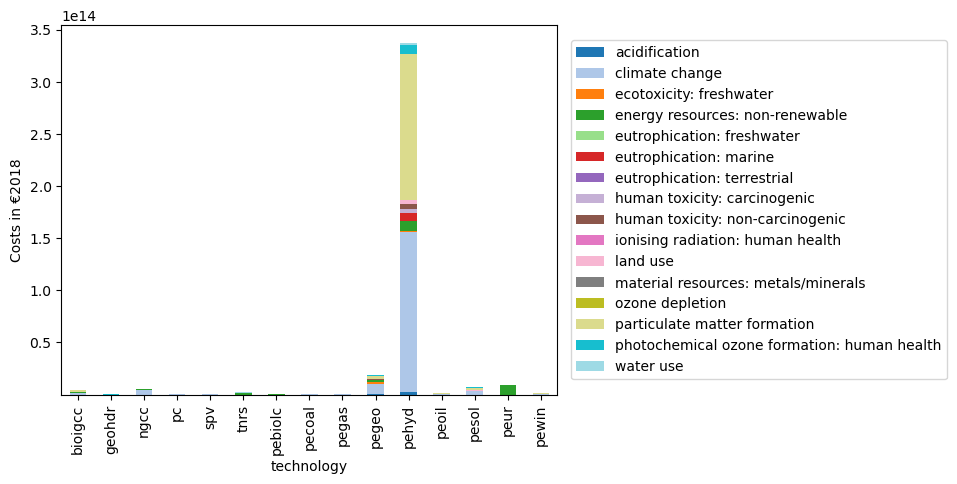

In [109]:
plt.figure(figsize=(11, 5))
ax = df.plot(kind="bar", stacked=True, colormap=cmap)
plt.ylabel("Costs in €2018")
plt.legend(loc="center right", bbox_to_anchor=[1.8, 0.5])

## Same with percentages

<Figure size 1100x500 with 0 Axes>

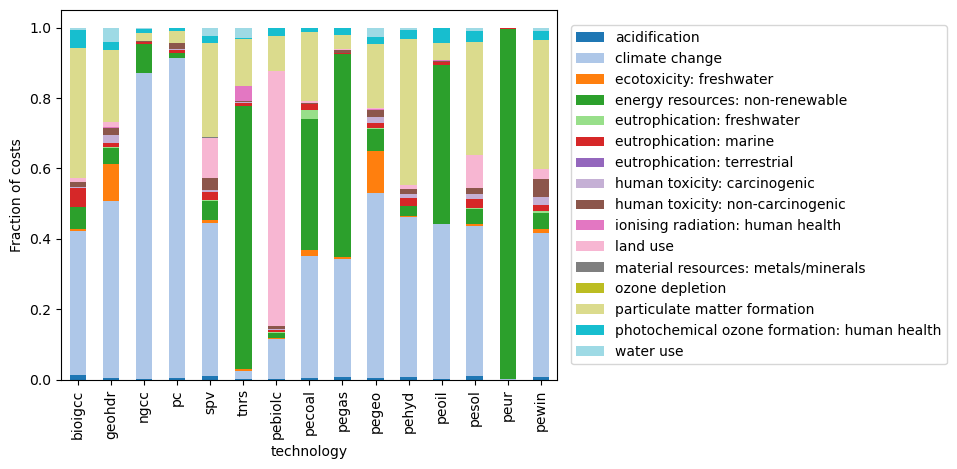

In [111]:
plt.figure(figsize=(11, 5))
ax = df_frac.plot(kind="bar", stacked=True, colormap=cmap)
plt.ylabel("Fraction of costs")
plt.legend(loc="center right", bbox_to_anchor=[1.8, 0.5])

## Using range of monetization factors

In [6]:
costs_with_uncertainty = costs.sum(dim=["region", "technology"])
costs_with_uncertainty

<xarray.DataArray (midpoint: 16, year: 19, estimate: 3)>
array([[[4.30742345e+09, 8.41905493e+09, 3.95744530e+10],
        [5.98582652e+09, 1.16995700e+10, 5.49947812e+10],
        [7.74872944e+09, 1.51452439e+10, 7.11914517e+10],
        [6.30485222e+09, 1.23231202e+10, 5.79258298e+10],
        [5.72522300e+09, 1.11902086e+10, 5.26004863e+10],
        [5.28454860e+09, 1.03288904e+10, 4.85517902e+10],
        [4.63679027e+09, 9.06281735e+09, 4.26005106e+10],
        [4.04125798e+09, 7.89882242e+09, 3.71290577e+10],
        [3.61728987e+09, 7.07015746e+09, 3.32338506e+10],
        [3.43182571e+09, 6.70765935e+09, 3.15298987e+10],
        [3.34006859e+09, 6.52831588e+09, 3.06868802e+10],
        [3.35147645e+09, 6.55061307e+09, 3.07916899e+10],
        [3.47268330e+09, 6.78751736e+09, 3.19052778e+10],
        [3.99380616e+09, 7.80607567e+09, 3.66930941e+10],
        [4.67219736e+09, 9.13202211e+09, 4.29258132e+10],
        [5.41941886e+09, 1.05925005e+10, 4.97909107e+10],
        [5.55288174e+09, 1.08533598e+10, 5.10171010e+10],
        [5.25640617e+09, 1.02738848e+10, 4.82932317e+10],
        [2.76428583e+09, 5.40292230e+09, 2.53968760e+10]],

...

       [[6.68864348e+09, 7.96571144e+09, 3.76575417e+11],
        [9.04122783e+09, 1.07674766e+10, 5.09027600e+11],
        [1.15026274e+10, 1.36988332e+10, 6.47606161e+11],
        [9.64223339e+09, 1.14832326e+10, 5.42864644e+11],
        [8.90971931e+09, 1.06108590e+10, 5.01623576e+11],
        [8.46145929e+09, 1.00770124e+10, 4.76386216e+11],
        [7.79621633e+09, 9.28475405e+09, 4.38932561e+11],
        [7.10641547e+09, 8.46324897e+09, 4.00096279e+11],
        [6.50479230e+09, 7.74675742e+09, 3.66224464e+11],
        [6.20495225e+09, 7.38966867e+09, 3.49343254e+11],
        [6.07444541e+09, 7.23424406e+09, 3.41995626e+11],
        [6.11515981e+09, 7.28273209e+09, 3.44287876e+11],
        [6.66593970e+09, 7.93867282e+09, 3.75297178e+11],
        [8.05865199e+09, 9.59729676e+09, 4.53707877e+11],
        [9.69546000e+09, 1.15466218e+10, 5.45861340e+11],
        [1.11611653e+10, 1.32921754e+10, 6.28381596e+11],
        [1.13579799e+10, 1.35265679e+10, 6.39462401e+11],
        [1.18233115e+10, 1.40807457e+10, 6.65660905e+11],
        [7.73598367e+09, 9.21302112e+09, 4.35541419e+11]]])
Coordinates:
  * year      (year) int32 2005 2010 2015 2020 2025 ... 2090 2100 2110 2130 2150
  * midpoint  (midpoint) object 'acidification' 'climate change' ... 'water use'
  * estimate  (estimate) object 'low' 'central' 'high'

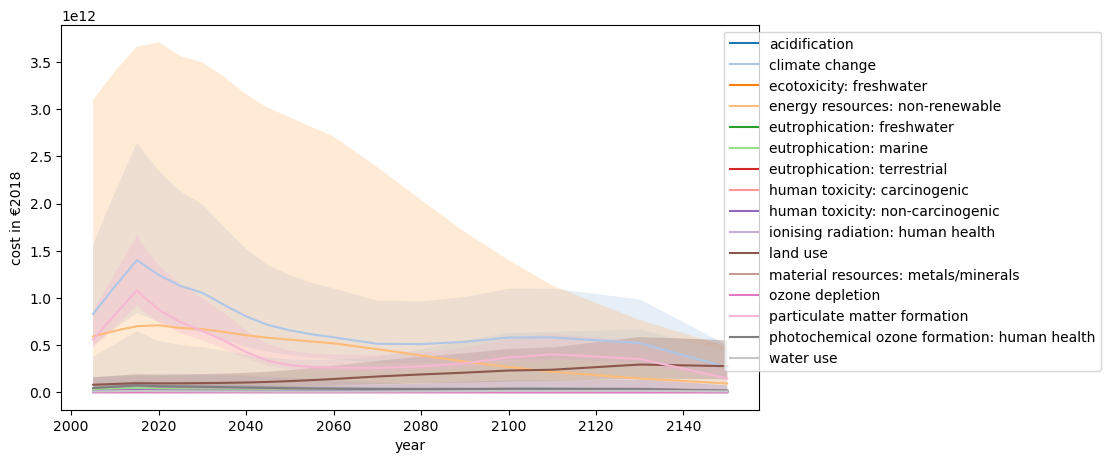

In [10]:
plt.figure(figsize=(9,5))
ax = plt.gca()
plt.xlabel("year")
plt.ylabel("cost in €2018")
for j, mp  in enumerate(midpoints):
    c = cm.get_cmap("tab20").colors[j]
    central = costs_with_uncertainty.sel(midpoint=mp, estimate="central")
    low = costs_with_uncertainty.sel(midpoint=mp, estimate="low")
    high = costs_with_uncertainty.sel(midpoint=mp, estimate="high")
    ax.plot(years, central, c=c, label=mp)
    ax.fill_between(years, low, high, facecolor=c, alpha=0.3)
plt.legend(loc="upper right", ncol=1, bbox_to_anchor=[1.5, 1])

## Just visualize MF ranges with current values

In [18]:
data = costs.sel(year=2020).sum(dim=["region", "technology"])
df = data.sel(estimate="central").to_pandas()
yerr = data.sel(estimate=["low", "high"])
print(yerr)

<xarray.DataArray (midpoint: 16, estimate: 2)>
array([[6.30485222e+09, 5.79258298e+10],
       [7.45486857e+11, 2.34676838e+12],
       [9.71359887e-10, 7.64082254e+10],
       [0.00000000e+00, 3.70988999e+12],
       [1.13492732e+09, 9.51592906e+09],
       [3.37529009e+10, 3.37529009e+10],
       [0.00000000e+00, 0.00000000e+00],
       [2.83030100e+09, 4.52847672e+10],
       [3.46253344e+09, 8.65627630e+10],
       [3.12645499e+09, 1.80161969e+11],
       [4.66963306e+10, 1.87322062e+11],
       [0.00000000e+00, 5.27198204e+08],
       [2.83704147e+07, 1.58277050e+08],
       [7.37212880e+11, 1.34151286e+12],
       [4.63765304e+10, 1.01282078e+11],
       [9.64223339e+09, 5.42864644e+11]])
Coordinates:
    year      int32 2020
  * midpoint  (midpoint) object 'acidification' 'climate change' ... 'water use'
  * estimate  (estimate) object 'low' 'high'


Text(0, 0.5, 'Costs in €2018')

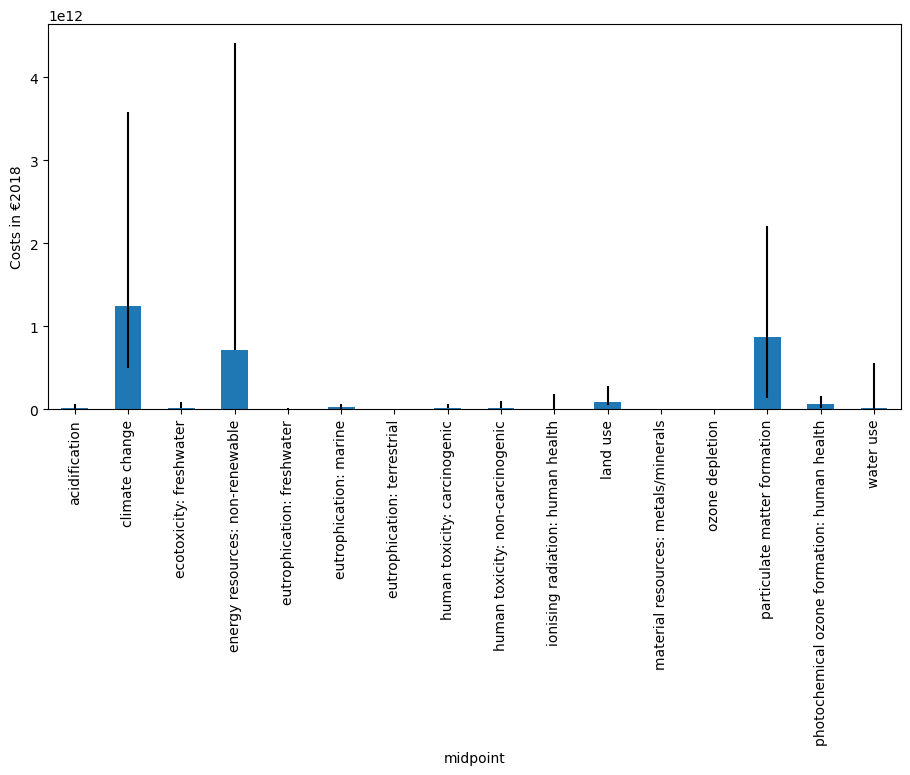

In [22]:
plt.figure(figsize=(11, 5))
ax = df.plot(kind="bar", stacked=True, yerr=yerr.T)
plt.ylabel("Costs in €2018")

## Visualizing the regional distribution of per unit impacts

In [29]:
data = specific_costs.sel(estimate="central")
region_means = data.mean(dim="region")
normalized_data = data / region_means
normalized_data

<xarray.DataArray (technology: 15, region: 12, midpoint: 16)>
array([[[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ]],

       [[0.32019455, 0.18700895, 0.00751304, ..., 0.30392232,
         0.24470376, 0.07940831],
        [0.74379576, 0.76662091, 0.66721401, ..., 0.74450499,
         0.73903751, 0.49645838],
        [0.74379576, 0.76662091, 0.66721401, ..., 0.74450499,
         0.73903751, 0.49645838],
...
        [0.99950105, 0.99478184, 0.99998714, ..., 0.99931356,
         0.99989099, 0.99966926],
        [0.99950105, 0.99478184, 0.99998714, ..., 0.99931356,
         0.99989099, 0.99966926],
        [1.0054884 , 1.05739976, 1.00014143, ..., 1.00755088,
         1.0011991 , 1.00363819]],

       [[1.02528619, 0.96412089, 0.99887678, ..., 1.09826403,
         0.98389058, 1.16413482],
        [0.99770126, 1.00326174, 1.00010211, ..., 0.99106691,
         1.00146449, 0.98507865],
        [0.99770126, 1.00326174, 1.00010211, ..., 0.99106691,
         1.00146449, 0.98507865],
        ...,
        [0.99770126, 1.00326174, 1.00010211, ..., 0.99106691,
         1.00146449, 0.98507865],
        [0.99770126, 1.00326174, 1.00010211, ..., 0.99106691,
         1.00146449, 0.98507865],
        [0.99770126, 1.00326174, 1.00010211, ..., 0.99106691,
         1.00146449, 0.98507865]]])
Coordinates:
  * midpoint    (midpoint) object 'acidification' ... 'water use'
  * technology  (technology) object 'bioigcc' 'geohdr' 'ngcc' ... 'peur' 'pewin'
  * region      (region) object 'CAZ' 'CHA' 'EUR' 'IND' ... 'REF' 'SSA' 'USA'
    estimate    <U7 'central'

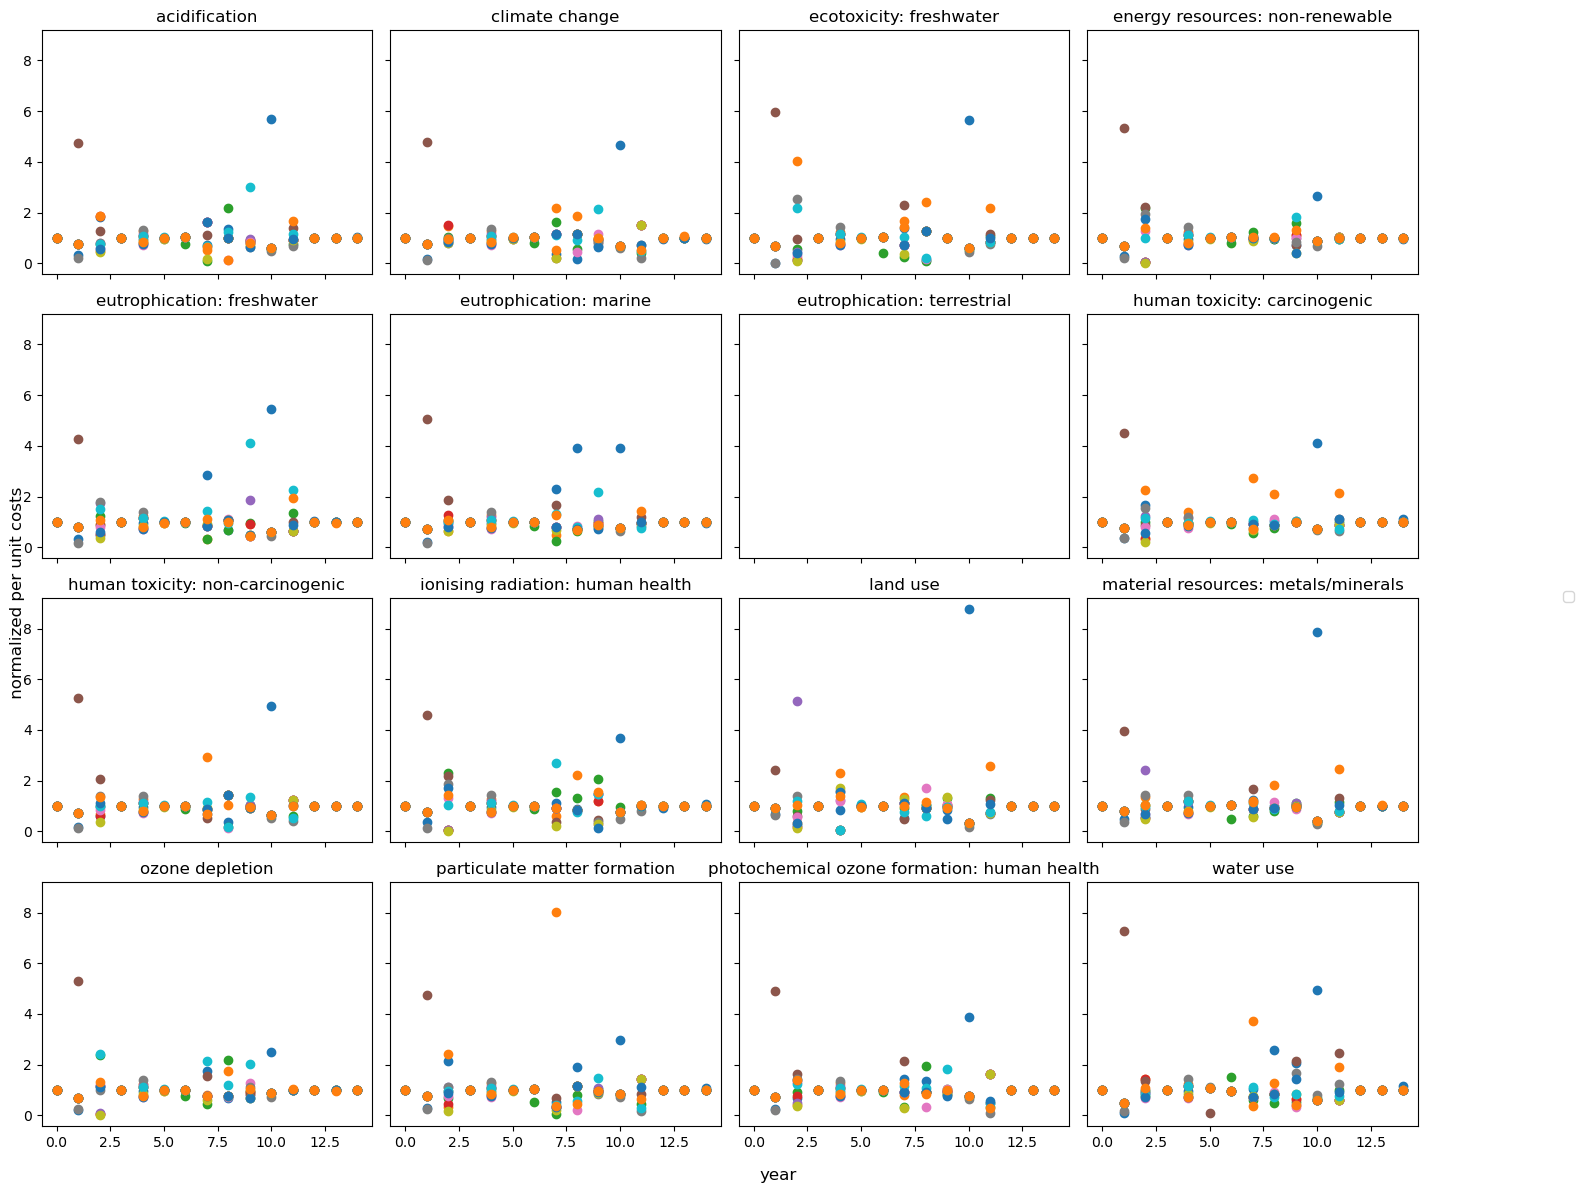

In [33]:
fig, axs = plt.subplots(
    nrows=4, ncols=4, 
    constrained_layout=True, sharex=True, sharey=True,
    figsize=(16, 12)
)

for ax, mp in zip(axs.flat, midpoints):
    for reg in regions:
        y = normalized_data.sel(midpoint=mp, region=reg).to_numpy()
        x = np.arange(y.size)
        ax.scatter(x, y)
    
    ax.set_title(mp)

fig.supxlabel("year")
fig.supylabel(" normalized per unit costs")

lines = []
labels = []
  
Line, Label = ax.get_legend_handles_labels()
lines.extend(Line)
labels.extend(Label)

fig.legend(lines, labels, loc=7)
fig.tight_layout()
fig.subplots_adjust(right=0.9)

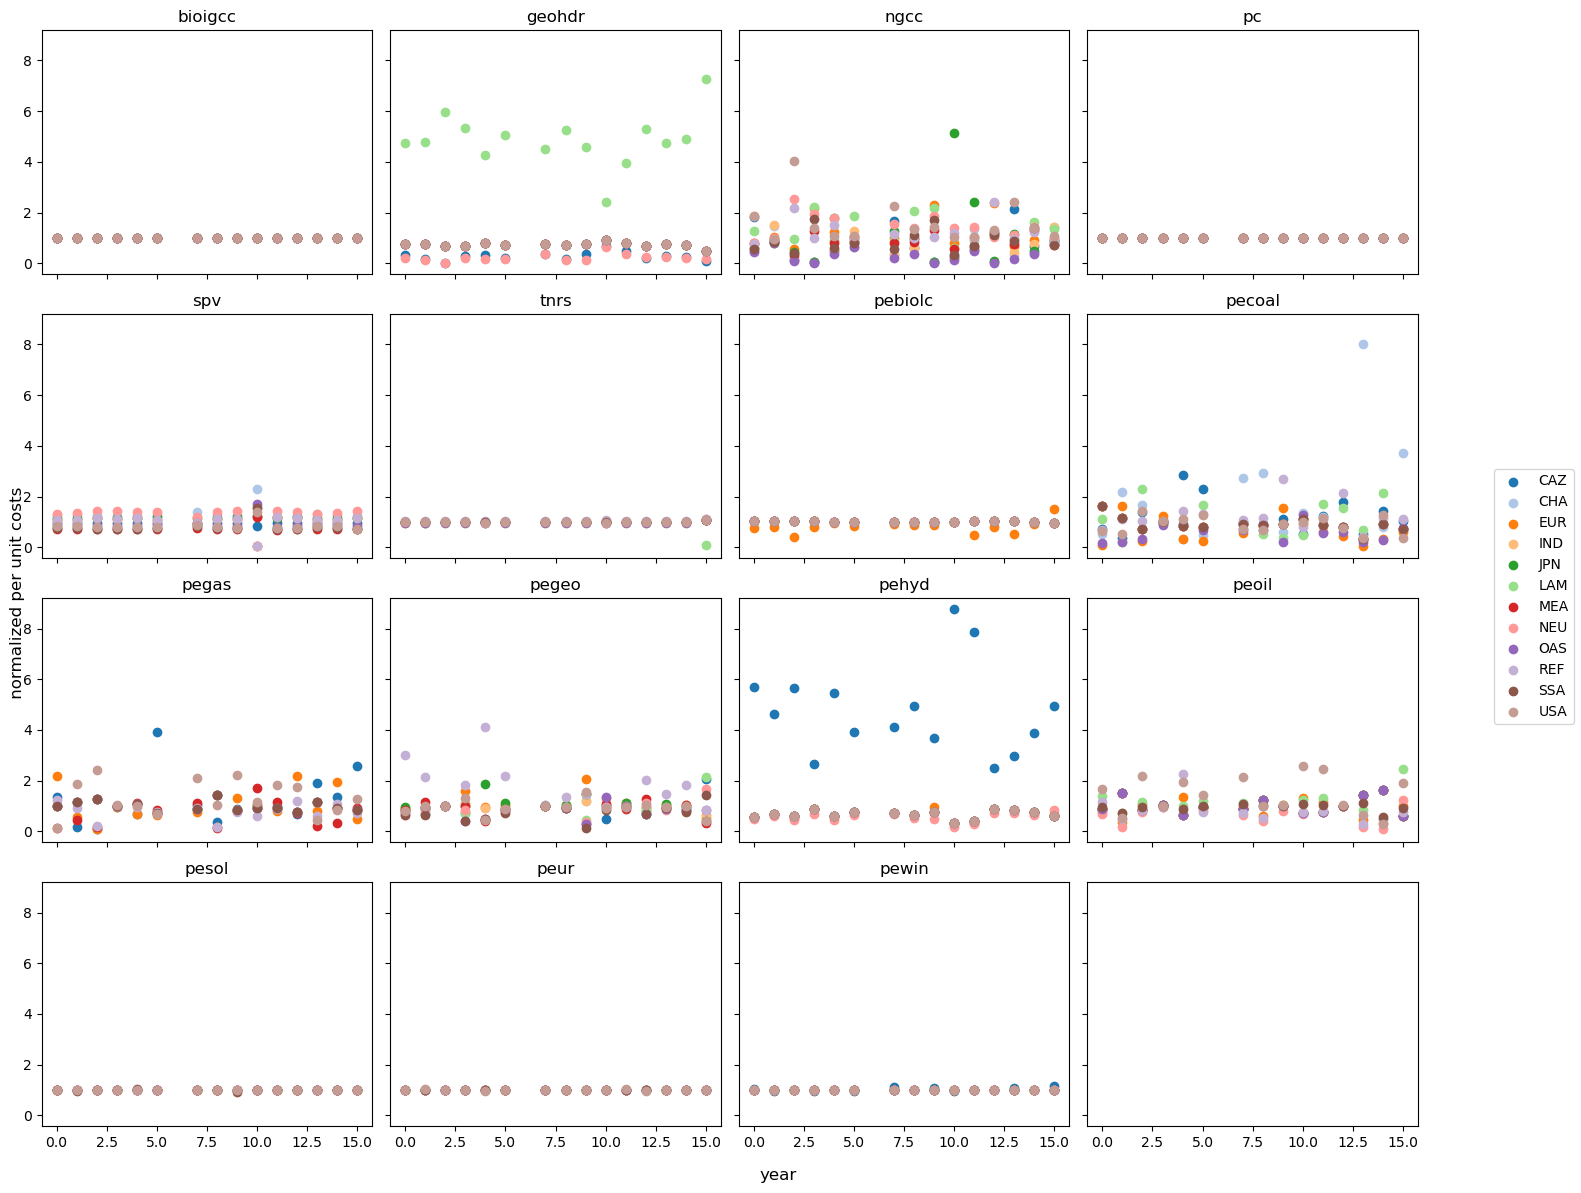

In [41]:
fig, axs = plt.subplots(
    nrows=4, ncols=4, 
    constrained_layout=True, sharex=True, sharey=True,
    figsize=(16, 12)
)

for ax, tech in zip(axs.flat, techs):
    for i, reg in enumerate(regions):
        c = cm.get_cmap("tab20").colors[i]
        y = normalized_data.sel(technology=tech, region=reg).to_numpy()
        x = np.arange(y.size)
        ax.scatter(x, y, label=reg, color=c)
    
    ax.set_title(tech)

fig.supxlabel("year")
fig.supylabel(" normalized per unit costs")

lines = []
labels = []
Line, Label = ax.get_legend_handles_labels()
lines.extend(Line)
labels.extend(Label)


fig.legend(lines, labels, loc=7)
fig.tight_layout()
fig.subplots_adjust(right=0.9)